## Data Collecting

### Install Libraries

In [11]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Download Dataset From Kaggle

In [12]:
#import opendatasets as od
#od.download("https://www.kaggle.com/datasets/knightbearr/sales-product-data")

### Read and Concat All CSV Dataset to DataFrame  

In [13]:
ls sales-product-data

ls: cannot access 'sales-product-data': No such file or directory


In [14]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
#path = "sales-product-data"
#all_csv = glob.glob(os.path.join(path, "*.csv"))
#li = []

#for csv_name in all_csv :
#    df = pd.read_csv(csv_name, index_col=None, header=0)
#    li.append(df)

#sls_df = pd.concat(li, axis=0, ignore_index=True)

In [16]:
ls

december_2022/


In [17]:
sls_df = pd.read_csv("december_2022/DataDNA Dataset Challenge - December 2022.csv")

## Data Cleaning

### Basic Info Dataset

In [18]:
df = sls_df.copy() 
print("row size : ", df.shape[0])
print("columns size : ", df.shape[1])

row size :  185686
columns size :  6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


### Missing Value Check

In [20]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.shape

(185686, 6)

### Data Types Check

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


#### Convert Order ID Type Data To Integer

In [25]:
df["Order ID"] = df["Order ID"].astype(int)

#### Convert Quantity Type Data To Integer

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [27]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

#### Convert Price Type Data To Float

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [29]:
df['Price Each'] = df['Price Each'].astype(float)

#### Convert and Order Date to DateTime

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [31]:

df['Order Date'] = pd.to_datetime(df['Order Date'], errors= 'coerce')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Duplicated Data Handling

In [34]:
#Check Duplicated Data
print("Duplicated data : ", df.duplicated().sum())

Duplicated data :  0


In [35]:
df[df.duplicated(keep=False)].sort_values("Order ID",ascending=True).tail(200)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [36]:
#Remove Duplicated Data
df = df.drop_duplicates()
print("Duplicated data : ", df.duplicated().sum())

Duplicated data :  0


In [37]:
df.shape

(185686, 6)

### Address Split

In [38]:
df[['Street', 'City', 'Postal Code']] = df['Purchase Address'].str.split(', ', expand=True)

In [39]:
df[['State Code', 'Postal Code']] = df['Postal Code'].str.split(' ', expand=True)

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street,City,Postal Code,State Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,75001,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,02215,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,90001,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,90001,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,90001,CA


In [41]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana','AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [42]:
df['State'] = df['State Code'].replace(states)

In [43]:
df = df.drop(columns='Purchase Address')

In [44]:
df = df.sort_values(by=['Order ID', 'Order Date'])
df = df.reset_index(drop=True)
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code,State Code,State
185681,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,14 Madison St,San Francisco,94016,CA,California
185682,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,549 Willow St,Los Angeles,90001,CA,California
185683,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,273 Wilson St,Seattle,98101,WA,Washington
185684,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,778 River St,Dallas,75001,TX,Texas
185685,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,747 Chestnut St,Los Angeles,90001,CA,California


## Initial Exploration

### Data Info

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Street            185686 non-null  object        
 6   City              185686 non-null  object        
 7   Postal Code       185686 non-null  object        
 8   State Code        185686 non-null  object        
 9   State             185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 14.2+ MB


### Row & Column Size

In [46]:
print("Row Size : ", df.shape[0])
print("Column Size : ", df.shape[1])

Row Size :  185686
Column Size :  10


### Univariate Analysis & Visualization

In [47]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Street', 'City', 'Postal Code', 'State Code', 'State'],
      dtype='object')

#### Numeric Attribute

In [48]:
df[['Quantity Ordered', 'Price Each']].describe()

,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


##### Quantity Ordered Distribution

Kurtosis & Skewness
Quantity Kurtosis : 31.775893532581897
Quantity Skewness : 4.82981115204352


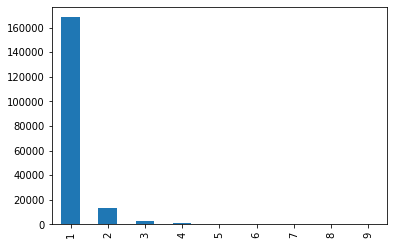

In [49]:
import seaborn as sns
df['Quantity Ordered'].value_counts().plot(kind='bar')
print("Kurtosis & Skewness")
print(f"Quantity Kurtosis : {df['Quantity Ordered'].kurt()}")
print(f"Quantity Skewness : {df['Quantity Ordered'].skew()}")

##### Product Price Distribution 

/tmp/ipykernel_136479/1651335801.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price Each'], shade =True)


Kurtosis & Skewness
Price Each Kurtosis : 9.083757442600207
Price Each Skewness : 2.870604736601146


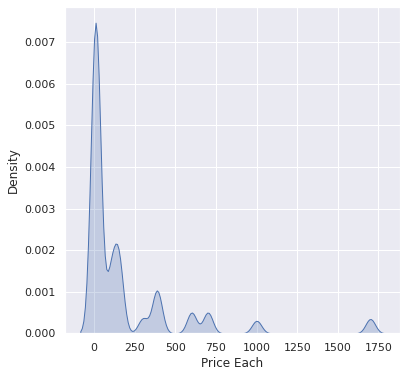

In [50]:
sns.set(rc={'figure.figsize':(6,6)})
sns.kdeplot(df['Price Each'], shade =True)

print("Kurtosis & Skewness")
print(f"Price Each Kurtosis : {df['Price Each'].kurt()}")
print(f"Price Each Skewness : {df['Price Each'].skew()}")

#### Non-Numeric (Categorical) Attribute

In [51]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
Product,185686,19,USB-C Charging Cable,21859
Street,185686,46837,640 West St,14
City,185686,9,San Francisco,44662
Postal Code,185686,10,94016,44662
State Code,185686,8,CA,74226
State,185686,8,California,74226


##### Top Product

In [52]:
df['Product'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

USB-C Charging Cable          11.77%
Lightning Charging Cable      11.64%
AAA Batteries (4-pack)         11.1%
AA Batteries (4-pack)         11.07%
Wired Headphones              10.15%
Apple Airpods Headphones       8.36%
Bose SoundSport Headphones     7.16%
27in FHD Monitor               4.04%
iPhone                         3.68%
27in 4K Gaming Monitor         3.35%
34in Ultrawide Monitor         3.32%
Google Phone                   2.97%
Flatscreen TV                  2.58%
Macbook Pro Laptop             2.54%
ThinkPad Laptop                2.22%
20in Monitor                   2.21%
Vareebadd Phone                1.11%
LG Washing Machine             0.36%
LG Dryer                       0.35%
Name: Product, dtype: object

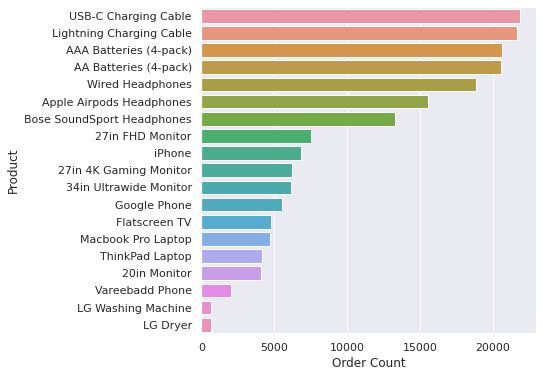

In [53]:
top_product = df.groupby('Product').size().sort_values().index[::-1]
ax = sns.countplot(y='Product', data=df, order=top_product)
ax.set(xlabel='Order Count', ylabel='Product')
plt.show()

##### Top 10 Street Buyer Address By Order Count

In [54]:
df['Street'].value_counts().sort_values(ascending=False).head(25).astype(str)

640 West St        14
732 Highland St    14
2 Hill St          14
753 Cedar St       14
986 7th St         14
594 6th St         14
922 Madison St     13
660 Center St      13
96 Elm St          13
479 2nd St         13
815 Willow St      13
462 Cedar St       13
692 13th St        13
971 Madison St     13
540 2nd St         12
329 Hill St        12
271 Adams St       12
975 13th St        12
2 Lake St          12
866 9th St         12
727 Dogwood St     12
186 North St       12
385 9th St         12
641 1st St         12
727 9th St         12
Name: Street, dtype: object

##### City

In [55]:
df['City'].value_counts(normalize=True).sort_values(ascending=False).round(2).astype(str) + '%'

San Francisco    0.24%
Los Angeles      0.16%
New York City    0.13%
Boston           0.11%
Atlanta          0.08%
Dallas           0.08%
Seattle          0.08%
Portland         0.07%
Austin           0.05%
Name: City, dtype: object

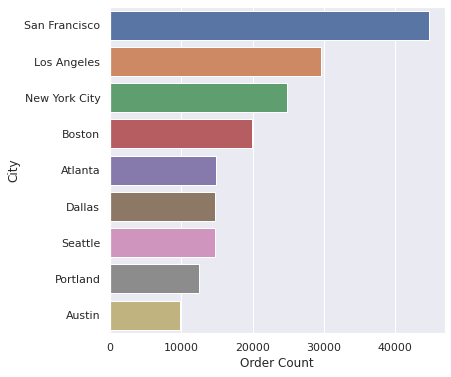

In [56]:
top_city = df.groupby('City').size().sort_values().index[::-1]
ax = sns.countplot(y='City', data=df, order=top_city)
ax.set(xlabel='Order Count', ylabel='City')
plt.show()

##### State

In [57]:
df['State'].value_counts(normalize=True).sort_values(ascending=False).round(2).astype(str) + '%'

California        0.4%
New York         0.13%
Texas            0.13%
Massachusetts    0.11%
Georgia          0.08%
Washington       0.08%
Oregon           0.05%
Maine            0.01%
Name: State, dtype: object

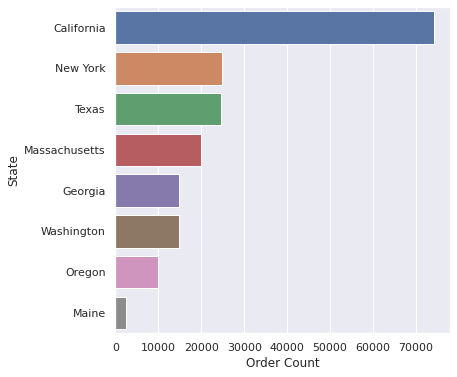

In [58]:
top_state = df.groupby('State').size().sort_values().index[::-1]
ax = sns.countplot(y='State', data=df, order=top_state)
ax.set(xlabel='Order Count', ylabel='State')
plt.show()

## Export Dataset to Excel Files

In [60]:
df.to_excel("december_2022/DataDNA_Dataset_December_2022_Processed.xlsx")  